In [4]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [5]:
# Step 2: Load Data
df_train = pd.read_csv("salary_train.csv")
df_test = pd.read_csv("salary_test.csv")


In [6]:
# step 3:show the data
df_train.head()


,ID,education_level,years_experience,job_title,industry,location,company_size,certifications,age,working_hours,crucial_code,salary
0,1,High School,12.0,Data Scientist,Education,New York,Medium,1.0,48.0,52.0,XEV156,NaN
1,2,PhD,17.0,Data Scientist,IT,New York,NaN,0.0,39.0,34.0,NaN,NaN
2,3,PhD,12.0,Software Engineer,Education,New York,Large,4.0,NaN,42.0,FIK684,95136.09799
3,4,Bachelors,1.0,Analyst,Healthcare,New York,Small,2.0,34.0,NaN,DKD155,70682.30628
4,5,High School,0.0,Analyst,IT,New York,Small,1.0,38.0,40.0,ZZH645,64887.65469


In [7]:
df_test.head()

,ID,education_level,years_experience,job_title,industry,location,company_size,certifications,age,working_hours,crucial_code
0,1,Masters,10.0,Manager,IT,London,NaN,3.0,22.0,36.0,NaN
1,2,PhD,2.0,Manager,Education,Bangalore,Small,NaN,54.0,58.0,WMZ413
2,3,PhD,15.0,Analyst,Finance,New York,Large,3.0,28.0,57.0,WQE613
3,4,Masters,NaN,Analyst,IT,London,Medium,1.0,48.0,36.0,UUF012
4,5,Masters,12.0,Manager,IT,London,Large,4.0,30.0,59.0,JGD966


In [8]:
# Step 4: Drop rows where salary is missing
df_train = df_train.dropna(subset=["salary"])

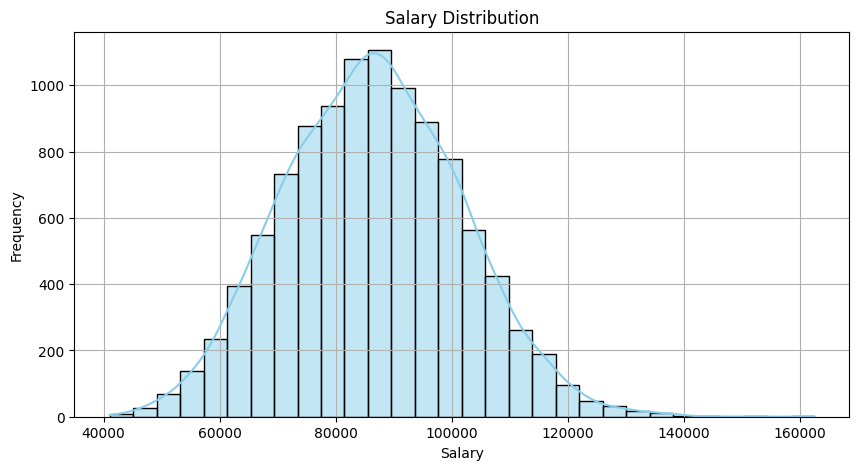

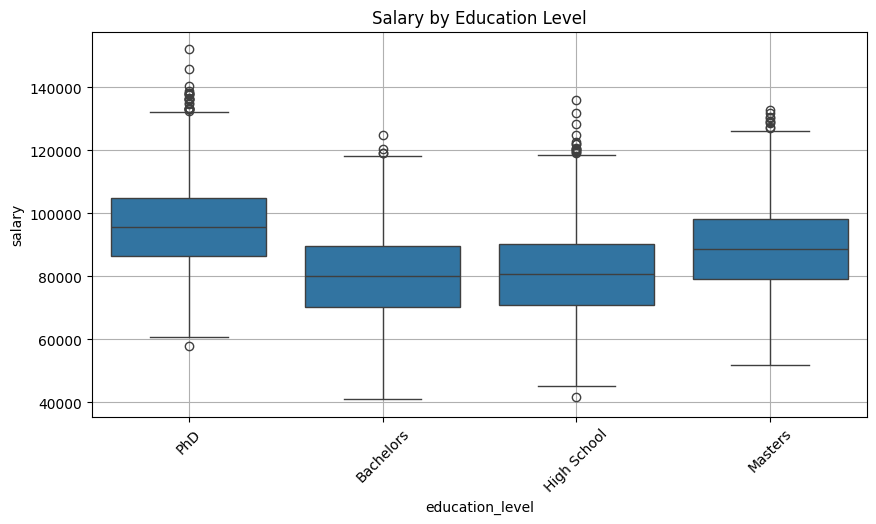

In [9]:
# Step 5: EDA – Visualizations
plt.figure(figsize=(10, 5))
sns.histplot(df_train["salary"], kde=True, bins=30, color="skyblue")
plt.title("Salary Distribution")
plt.xlabel("Salary")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(x="education_level", y="salary", data=df_train)
plt.title("Salary by Education Level")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [10]:
# Step 6: Separate features and target
X = df_train.drop(columns=["ID", "salary"])
y = df_train["salary"]

In [11]:
# Step 7: Handle Missing Values (fixed)
for col in X.select_dtypes(include=["float64", "int64"]).columns:
    X[col] = X[col].fillna(X[col].mean())

for col in X.select_dtypes(include=["object"]).columns:
    X[col] = X[col].fillna(X[col].mode()[0])

In [12]:
# Step 8: Encode Categorical Columns
X = pd.get_dummies(X)


In [13]:
# Step 9: Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [14]:
# Step 10: Train-Test Split
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [15]:
# Step 11: Train Model
model = RandomForestRegressor(n_estimators=30, random_state=42, n_jobs=-1)
model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=30, n_jobs=-1, random_state=42)

In [16]:
# Step 12: Evaluate Model
y_pred = model.predict(X_val)
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
print(f"\n📉 Validation RMSE: ₹{rmse:.2f}\n")


📉 Validation RMSE: ₹8615.00



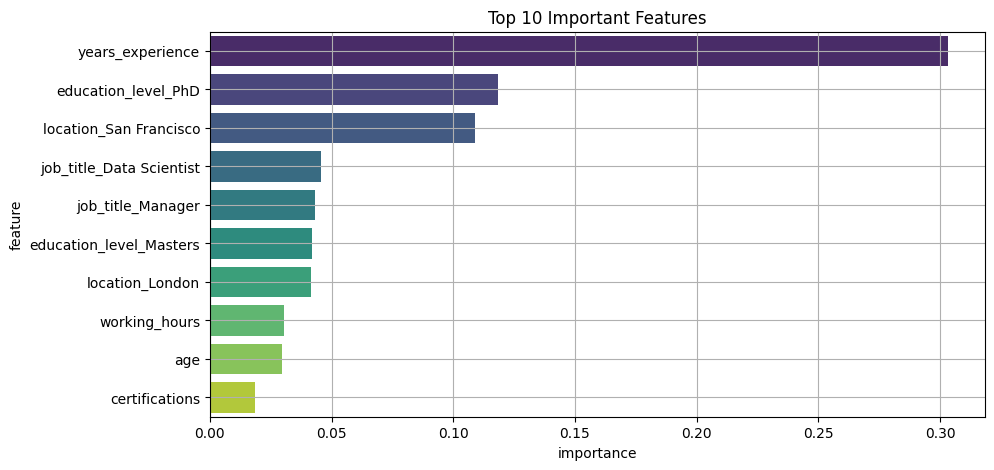

In [18]:
# Step 13: Feature Importance
importances = model.feature_importances_
feature_names = X.columns
feat_df = pd.DataFrame({"feature": feature_names, "importance": importances})
feat_df = feat_df.sort_values(by="importance", ascending=False).head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x="importance", y="feature", data=feat_df, palette="viridis", hue="feature", legend=False)
plt.title("Top 10 Important Features")
plt.grid(True)
plt.show()


In [21]:
# Step 14: Prepare Test Set (fixed)
X_test = df_test.drop(columns=["ID"])
test_ids = df_test["ID"]
for col in X_test.select_dtypes(include=["float64", "int64"]).columns:
    if col in X.columns:
        X_test[col] = X_test[col].fillna(X[col].mean())

for col in X_test.select_dtypes(include=["object"]).columns:
    if col in X.columns:
        X_test[col] = X_test[col].fillna(X[col].mode()[0])

X_test_encoded = pd.get_dummies(X_test)
X_test_encoded = X_test_encoded.reindex(columns=X.columns, fill_value=0)
X_test_scaled = scaler.transform(X_test_encoded)

In [23]:
# Step 15: Predict and Show Output
y_test_pred = model.predict(X_test_scaled)
results = pd.DataFrame({
    "ID": test_ids,
    "Predicted_Salary": y_test_pred
})

# 🎯 Display Predictions
print("📊 Sample Salary Predictions:\n")
print(results.head(10).to_string(index=False))

# Save to CSV file
results.to_csv("salary_predictions.csv", index=False)


📊 Sample Salary Predictions:

 ID  Predicted_Salary
  1      99570.639186
  2      83583.746373
  3      95171.053605
  4      88383.753615
  5      98299.376355
  6     105678.647906
  7      96221.485972
  8      84118.298194
  9      97826.514765
 10      73691.850336
